## Analyzing Open University Learning Analytics Dataset 

### Problem Statement 
## Feature Engineering

Based on the given data of students enrolled in various courses identify the student who is at-risk so that suitable interventions can be taken to help students succeed. 

***Part-3 : Preprocessing and Feature Engineering***

In this part we will try to extract the features based on the insights and inferences from SomeVisualization.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier as dt # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split as tts # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report
import seaborn as sn
import xgboost as xgb


## Status of Different DataSet

In [2]:
# Reading Data
student_info = pd.read_csv('../studentInfo.csv')
student_assesment = pd.read_csv('../studentAssessment.csv')
student_registration = pd.read_csv('../studentRegistration.csv')
student_vle = pd.read_csv('../studentVle.csv')
assesments = pd.read_csv('../assessments.csv')
courses = pd.read_csv('../courses.csv')
vle = pd.read_csv('../vle.csv')

#check for the data
print('----- Rows -----')
print('Courses                           : ',courses.shape[0])
print('Assessments                       : ',assesments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info                      : ',student_info.shape[0])
print('student Assessment                : ',student_assesment.shape[0])
print('student Registration              : ',student_registration.shape[0])
print('student Vle                       : ',student_vle.shape[0])

----- Rows -----
Courses                           :  22
Assessments                       :  206
vle(Virtual Learning Environment) :  6364
Student Info                      :  32593
student Assessment                :  173912
student Registration              :  32593
student Vle                       :  10655280


In [3]:
# Import required packages

#--- as final_result is a categorical column we can convert that into numeric using label_encoding
labelEncoder = preprocessing.LabelEncoder()
OHencoder= preprocessing.OneHotEncoder()

In [4]:
#Utilities
"""
Calculates sum based on the previous value
"""
def compute_weighted_sum(data, current_val, new_col):
    data[new_col] = data[current_val].cumsum()
    return data


In [5]:
"""
Get mean of the split data
"""
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

In [6]:
"""
Preprocessing Student_info
"""

def preprocess_student_info(data):
    data_pre = data.copy()
    data_pre['final_result'] = labelEncoder.fit_transform(data_pre['final_result'])
    #convert categorical columns 
    #----imd_band
    # Remove % first and replace '?' with 0 
    data_pre['imd_band'] =  data_pre['imd_band'].apply(lambda x : x.replace('%',''))
    data_pre['imd_band'] =  data_pre['imd_band'].apply(lambda x : '0' if x == '?' else x)
    #compute mean of the range and add them in seperate column
    data_pre['imd_band_mean'] = data_pre['imd_band'].apply(lambda x : 0 if x == '0' else split_mean(x))
    #----age_band
    # Replace '55<=' with 55 and other ranges with their mean 
    data_pre['age_band_mean'] =  data_pre['age_band'].apply(lambda x : 55 if x == '55<=' else split_mean(x))
    data_pre = data_pre[['code_module','code_presentation','id_student','gender','region','highest_education','num_of_prev_attempts','studied_credits','imd_band','imd_band_mean','age_band','age_band_mean','final_result']]
    return data_pre
        

### Feature Extraction from student_info

***For Calculation purpose we encode the categorical data***

Label Encoding : Only for the Final variable

*In this case*

distinction  - 0

fail  - 1

pass  - 2

withdrawn - 3

One-Hot Encoding

In [7]:
# generating heatmap and mapping correlation matrix -- Using Demographic info -- student_info
#student_info.info() #--- to get info
print(student_info.shape)
student_info.head(50) #--- No NULL Columns
# breaking the data frame into categorical and non categorical value to get the correlation matrix
# as student id is unique we might not require that 
# --- columns num_prev_attempts, studied_credits [['num_of_prev_attempts','studied_credits', 'final_result']]
# student_info_numeric = preprocess_student_info(student_info)
# #student_info_numeric.corr()
# sns.heatmap(student_info.corr(), annot = True, vmin = 0, cmap = 'GnBu')
# plt.show()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


 We can see that in predicting final_result, ***studied_credits*** have a very strong impact compared to prevous attmepts
 
 we can also use columns like highest_education, age_band

In [8]:
student_bg = student_info[['highest_education','region','final_result']]
student_info_cat = pd.get_dummies(student_info[['code_module','code_presentation','gender','highest_education','region']])
#student_bg['highest_education'] = labelEncoder.fit_transform(student_bg['highest_education'])
#student_bg['region'] = labelEncoder.fit_transform(student_bg['region'])

#x = OHencoder.fit_transform(student_bg['highest_education']).to_Array()

### Feature extraction from student_assessment

- to get the student assessment pass/fail we know that if scoe is < 40 - fail, >= 40 and <=100 - pass

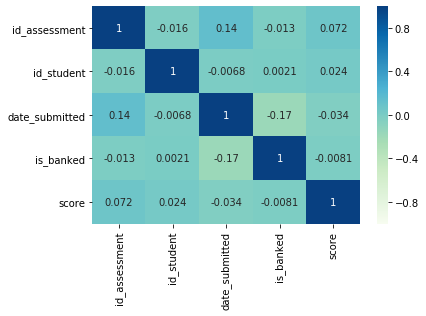

In [9]:
""" # --student_assessment.info()
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173912 non-null object ---- no null values but has '?' for 173 rows replace it with 0 as this may casue problem

Pass - 1
Fail - 0
"""
student_asmt = student_assesment.copy()
student_asmt.isnull().sum()
#student_asmt.score[student_asmt['score']>0]
#student_asmt[(student_asmt['is_banked'] == 1) & (student_asmt['score'] == '?')].sum()
# #preprocessing is required replace '?' with 0
# student_asmt['score'] = np.where(student_asmt['score'] == '?', '0', student_asmt['score'])
# student_asmt['score'] = pd.to_numeric(student_asmt['score'])
# student_asmt['assessment_result'] = np.where(student_asmt['score'] >= 40, 1, 0)
# #plotting correlation matrix to determine inportant feature for predicting the result 
sns.heatmap(student_asmt.corr(), annot = True, vmin = -1, cmap = 'GnBu')
plt.show()

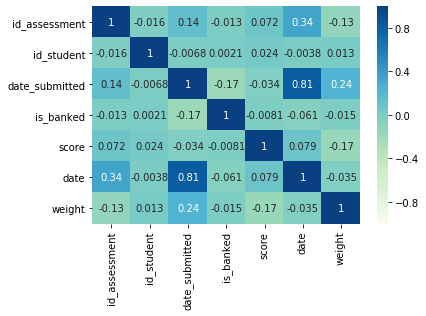

In [10]:
#assesments table 
#assessments.info()
#assessments[assessments['date']=='?']
#assessments[assessments['code_module']=='EEE']
#---- merge tables assessments and student_assessments
student_assesments_all = pd.merge(student_asmt, assesments, how = 'outer', on='id_assessment' )
#plotting correlation matrix to determine inportant feature for predicting the result 
sns.heatmap(student_assesments_all.corr(), annot = True, vmin = -1, cmap = 'GnBu')
plt.show()


In [11]:
#adding some more columns
assesments_stats = assesments.groupby(['code_module','code_presentation']).agg({'weight' : 'sum'})
assesments_stats.reset_index(level=[0,1], inplace=True)
assesments_stats.columns = ['code_module','code_presentation','total_marks']
assesments_stats = pd.merge(assesments, assesments_stats, how='left', on=['code_module','code_presentation'])
assesments_stats['percent_of_total'] = np.divide(assesments_stats['weight'],assesments_stats['total_marks'])*100
#assessments_stats.groupby(['code_module','code_presentation']).size()
assesments_stats = assesments_stats.groupby(['code_module','code_presentation']).apply(compute_weighted_sum, 'percent_of_total', 'weight_in_total')
assesments_stats.head()
assesments_stats.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,total_marks,percent_of_total,weight_in_total
0,AAA,2013J,1752,TMA,19.0,10.0,200.0,5.0,5.0
1,AAA,2013J,1753,TMA,54.0,20.0,200.0,10.0,15.0
2,AAA,2013J,1754,TMA,117.0,20.0,200.0,10.0,25.0
3,AAA,2013J,1755,TMA,166.0,20.0,200.0,10.0,35.0
4,AAA,2013J,1756,TMA,215.0,30.0,200.0,15.0,50.0


## Student performance based on differnt Assesments

In [12]:
# student_assesments_all=student_assesments_all.drop('date',axis=1)
student_assesments_all[student_assesments_all['id_student'] == 63400]
student_assesments_all['weighted_score']=np.multiply(student_assesments_all['score'],student_assesments_all['weight']/100)/2
x=np.divide(student_assesments_all['weight'],2)
student_assesments_all['weight']=x

In [13]:
x=student_assesments_all.groupby(['code_module','code_presentation','id_student']).agg({'weighted_score':'sum'})


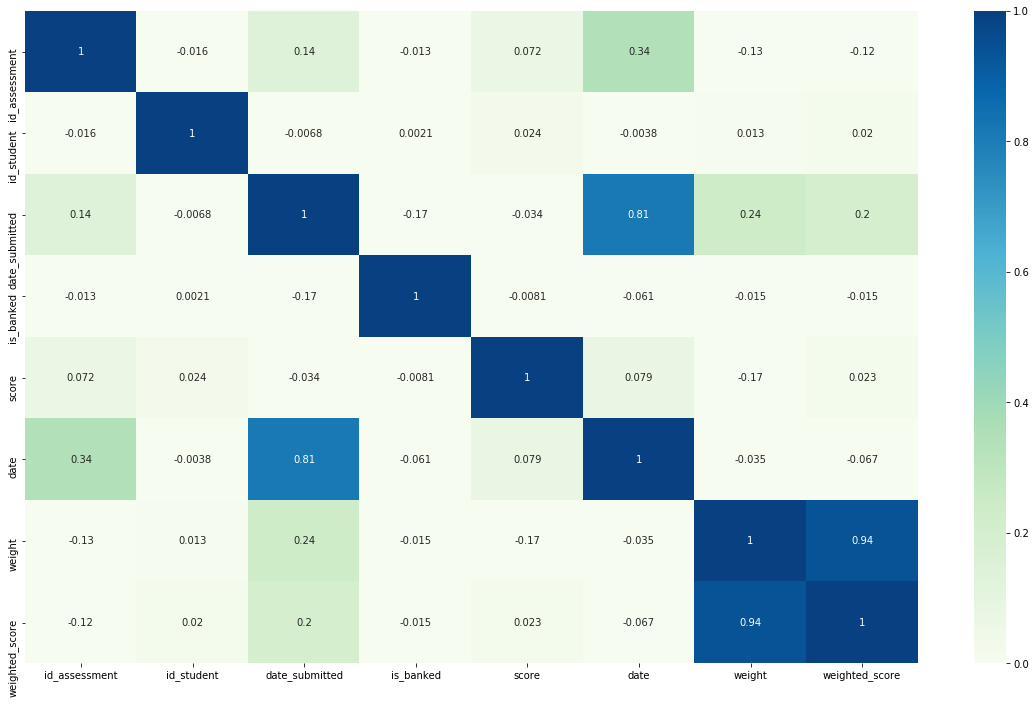

In [14]:
#try to find correlation between final_result and remaining variables
plt.figure(figsize=(20,12))
sns.heatmap(student_assesments_all.corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

***Inferences***
- we can see that score has a major role in predicting the final result of assessment, the score_in _total comes second so we can use them in features, where as date submitted has least

### Feature Extraction from student_vle

- Based on the insights from Part1, we can create 2 data frames, 1 for having mean of total number of clicks for whole course, 2 for having the distribution of clicks for all the assessments individually. 

- extract the feature of the student, in VLE context we know that the usefulthing is number of clicks, but the clicks vary by many activity_types mapped with id_site in vle_table, based on the inference from EDA we can extract the information by taking  ***assessment_deadline*** and comparing it with ***date*** column in student_vle to calculate the number of clicks before that assessment, in this way we can use the data to predict the final_result.


***Creating a dataframe by merging student_info with student_clicks for particular course***

In [15]:
#student_vle.info()
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
student_clicks.reset_index(level=[0,1,2], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']
#student_clicks
# merging student_clicks with student info
student_course_info = pd.merge(student_info,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
student_course_info.reset_index(level=[0], inplace=True)
student_course_info.head()
x=student_course_info.final_result.value_counts()
print(x)

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


In [16]:
student_course_info.final_result.value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [17]:
student_course_info=student_course_info.dropna()
student_course_info['final_result'] = labelEncoder.fit_transform(student_course_info['final_result'])
student_course_info['disability']=labelEncoder.fit_transform(student_course_info['disability'])
student_course_info['age_band']=labelEncoder.fit_transform(student_course_info['age_band'])
student_course_info['gender']=labelEncoder.fit_transform(student_course_info['gender'])
student_course_info['highest_education']=labelEncoder.fit_transform(student_course_info['highest_education'])
# student_course_info['imd_band']=student_course_info.imd_band.map({'90-100%':9,'20-30%':2,'30-40%':3,'50-60%':5,'60-70%':6,'80-90%':8,'40-50%':4,'0-10%':0,'10-20':1,'70-80%':7})
# student_course_info['imd_band']=student_course_info.imd_band.dropna()

# # # # student_course_info.imd_band.head()
# # # # print(student_course_info.imd_band.dtype)
# # # # # student_course_info['imd_band']=labelEncoder.fit_transform(student_course_info['imd_band'])
# # # # # student_course_info['imd_band']=student_course_info['imd_band'][student_course_info['imd_band'].strip('%')]
# # # # # student_course_info['imd_band']=labelEncoder.fit_transform(student_course_info['imd_band'])
# # # # # student_course_info[student_course_info.id_student.duplicated()].sort_values(by='id_student')
# # # # # sns.heatmap(student_course_info.corr(), annot = True, vmin = -1, cmap = 'GnBu')
# # # # # plt.show()
student_course_info.isnull().sum()
# student_course_info.imd_band.value_counts()
# # # y.head()

index                   0
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
mean_clicks             0
sum_clicks              0
dtype: int64

In [18]:
student_course_info['imd_band']=student_course_info.imd_band.map({'90-100%':9,'20-30%':2,'30-40%':3,'50-60%':5,'60-70%':6,'80-90%':8,'40-50%':4,'0-10%':0,'10-20':1,'70-80%':7})

In [19]:
student_course_info.imd_band.value_counts()
student_course_info.isnull().sum()

index                   0
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
mean_clicks             0
sum_clicks              0
dtype: int64

In [20]:
student_course_info.region.value_counts()

Scotland                3167
East Anglian Region     2988
London Region           2814
South Region            2756
North Western Region    2518
West Midlands Region    2226
South West Region       2192
East Midlands Region    2074
Wales                   1956
South East Region       1900
Yorkshire Region        1774
North Region             951
Ireland                  858
Name: region, dtype: int64

In [21]:
student_course_info['region']=labelEncoder.fit_transform(student_course_info['region'])
student_course_info['code_presentation']=labelEncoder.fit_transform(student_course_info['code_presentation'])
student_course_info['code_module']=labelEncoder.fit_transform(student_course_info['code_module'])

In [22]:

#student_course_info.head(20)
student_course_info.set_index(['id_student'],inplace=True)
student_course_info=student_course_info.drop('index',axis=1)
student_course_info.to_csv("final_data.csv")
student_course_info['final_result']=student_course_info.final_result.map({1:'Fail',2:'Pass',3:'Withdraw',0:'Distinction'})
student_course_info.to_csv("final_data_nominal.csv")
student_course_info.head()
# student_course_info[student_course_info.final_result==3].value_counts()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_clicks,sum_clicks
id_student,,,,,,,,,,,,,
11391,0,1,1,0,1,9,2,0,240,0,Pass,4.765306,934.0
28400,0,1,0,6,1,2,1,0,60,0,Pass,3.337209,1435.0
30268,0,1,0,5,0,3,1,0,60,1,Withdraw,3.697368,281.0
31604,0,1,0,7,0,5,1,0,60,0,Pass,3.254902,2158.0
32885,0,1,0,11,2,5,0,0,60,0,Pass,2.937500,1034.0


In [23]:
df_feature=student_course_info.drop('final_result',axis=1)
df_target=student_course_info['final_result']
student_course_info.shape

(28174, 13)

In [24]:
# X_train,X_test,y_train,y_test=train_test_split(df_feature,df_target,test_size=0.1,random_state=42)

In [25]:
# xgb_model=xgb.XGBClassifier(objective='multi:softprob',random_state=42)

In [26]:
# xgb_model.fit(X_train,y_train)

In [27]:
# y_pred=xgb_model.predict(X_test)

In [28]:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [29]:
# plt.figure(figsize=(20,20))
# xgb.plot_importance(xgb_model)
# plt.show()

## Model Evaluation Function

In [30]:
def model_analysis(model,x,y):
        if model=='DT' :
            model='dt'
            train_model('dt',x,y)
        elif model=='RF' :
            model='rfc'
            train_model('rfc',x,y)
        elif model=='XGB' :
            model='xgb'
            train_model('xgb',x,y)

def train_model(model,x,y):
        df_feature=x
        df_target=y
        X_train,X_test,y_train,y_test=tts(df_feature,df_target,random_state=45,test_size=0.2)
        if model=='dt':    
            clf=dt(criterion="entropy", max_depth=4,random_state=42)
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            accuracy=metrics.accuracy_score(y_test, y_pred)*100
            print("Accuracy:",round(accuracy,2))
            CM= confusion_matrix(y_test, y_pred)
            print(CM)
            sn.heatmap(CM)
            report=classification_report(y_test,y_pred)
            print(report)
            plt.show()
            
        elif model=='rfc':    
            clf=rfc(random_state=42)
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            accuracy=metrics.accuracy_score(y_test, y_pred)*100
            print("Accuracy:",round(accuracy,2))
            CM= confusion_matrix(y_test, y_pred)
            print(CM)
            sn.heatmap(CM)
            report=classification_report(y_test,y_pred)
            print(report)
            plt.show()
            
        elif model=='xgb':    
            xgb_model=xgb.XGBClassifier(objective='binary:logistic',random_state=42)
            xgb_model.fit(X_train,y_train)
            y_pred = xgb_model.predict(X_test)
            accuracy=metrics.accuracy_score(y_test, y_pred)*100
            print("Accuracy:",round(accuracy,2))
            CM= confusion_matrix(y_test, y_pred)
            print(CM)
            sn.heatmap(CM)
            plt.figure(figsize=(20,20))
            xgb.plot_importance(xgb_model)
            report=classification_report(y_test,y_pred)
            print(report)
            plt.show()

## Model Evaluations

Accuracy: 59.33
[[   4    4  577    8]
 [   0  311  528  449]
 [   4  101 2170   94]
 [   0  172  355  858]]
              precision    recall  f1-score   support

 Distinction       0.50      0.01      0.01       593
        Fail       0.53      0.24      0.33      1288
        Pass       0.60      0.92      0.72      2369
    Withdraw       0.61      0.62      0.61      1385

    accuracy                           0.59      5635
   macro avg       0.56      0.45      0.42      5635
weighted avg       0.57      0.59      0.53      5635



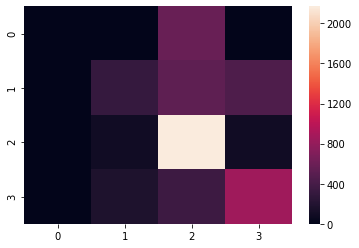

<Figure size 1440x1440 with 0 Axes>

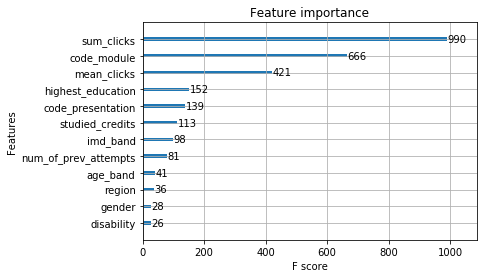

In [31]:
model_analysis('XGB',df_feature,df_target)

Accuracy: 56.79
[[   0    1  576   16]
 [   0  118  556  614]
 [   0   29 2120  220]
 [   0   56  367  962]]
              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00       593
        Fail       0.58      0.09      0.16      1288
        Pass       0.59      0.89      0.71      2369
    Withdraw       0.53      0.69      0.60      1385

    accuracy                           0.57      5635
   macro avg       0.42      0.42      0.37      5635
weighted avg       0.51      0.57      0.48      5635



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


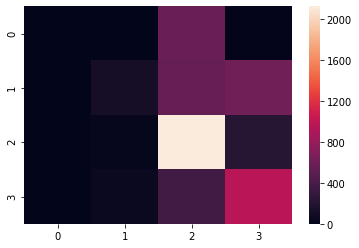

In [32]:
model_analysis('DT',df_feature,df_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 54.73
[[ 108   28  445   12]
 [  23  462  424  379]
 [ 158  283 1820  108]
 [  10  388  293  694]]
              precision    recall  f1-score   support

 Distinction       0.36      0.18      0.24       593
        Fail       0.40      0.36      0.38      1288
        Pass       0.61      0.77      0.68      2369
    Withdraw       0.58      0.50      0.54      1385

    accuracy                           0.55      5635
   macro avg       0.49      0.45      0.46      5635
weighted avg       0.53      0.55      0.53      5635



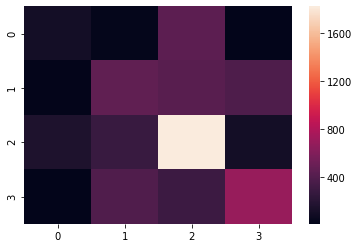

In [33]:
model_analysis("RF",df_feature,df_target)

In [34]:
y=student_course_info.final_result.value_counts()
print(y)

Pass           11827
Withdraw        6985
Fail            6537
Distinction     2825
Name: final_result, dtype: int64


## After Encoding 
# Pass           :2
# Withdrawn      :3
# Fail           :1
# Distinction    :0

***by seeing the above heatmap of correlation we can say that number of clicks might not be an important feature at all as the show less correlation with the final_result***

In [35]:
#merge
def getAssessmentdetails(data1, data2,new_col):
    #data2[new_col] = np.where(data2['date'] <= (data1['date']),data1['id_assessment'],'?')
    #print(np.array(data2['date']))
    return data1 
#assessments_group_by = assessments.groupby(['code_module','code_presentation'])
#student_vle_group_by = student_vle.groupby(['code_module','code_presentation']).apply()

In [36]:
assesments_group_by = assesments.copy()

assesments_group_by.dropna(inplace=True)
assesments_group_by.isnull().sum()
assesments_group_by['date'] = np.where(assesments_group_by['date'] == '?', '0', assesments_group_by['date'])
assesments_group_by['date'] = pd.to_numeric(assesments_group_by['date'])
assesments_group_by = assesments_group_by.groupby(['code_module','code_presentation'])
student_vle_group_by = student_vle.groupby(['code_module','code_presentation']).apply(getAssessmentdetails,assesments_group_by,'id_assessment')
#getAssessmentdetails(assessments_group_by, student_vle_group_by, 'id_assessment')
#student_vle_group_by

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [37]:
student_vle[student_vle['id_student'] == 6516]['sum_click'].sum()

2791

In [38]:
student_vle[student_vle['id_student'] == 6516].sum_click.sum()

2791

In [39]:
student_vle.groupby(['id_student','code_module','code_presentation']).size()

id_student  code_module  code_presentation
6516        AAA          2014J                 662
8462        DDD          2013J                 300
                         2014J                   4
11391       AAA          2013J                 196
23629       BBB          2013B                  59
23698       CCC          2014J                 305
23798       BBB          2013J                 306
24186       GGG          2014B                  82
24213       DDD          2014B                 739
24391       GGG          2013J                 230
24734       AAA          2014J                 230
25107       BBB          2013B                 523
25150       EEE          2014B                 507
25261       CCC          2014J                 326
25572       DDD          2014J                  59
25629       BBB          2014B                   7
25997       BBB          2014B                   7
26023       GGG          2013J                 265
26192       AAA          2014J         

In [40]:
student_vle.groupby(['id_student','code_module']).size()

id_student  code_module
6516        AAA             662
8462        DDD             304
11391       AAA             196
23629       BBB              59
23698       CCC             305
23798       BBB             306
24186       GGG              82
24213       DDD             739
24391       GGG             230
24734       AAA             230
25107       BBB             523
25150       EEE             507
25261       CCC             326
25572       DDD              59
25629       BBB               7
25997       BBB               7
26023       GGG             265
26192       AAA             659
26211       FFF            2440
26247       FFF             148
26315       BBB             617
26734       BBB             112
26915       EEE              31
27116       CCC             708
27189       FFF             473
27417       DDD             185
27683       FFF             400
27759       BBB             182
27780       EEE             159
27891       BBB             128
                